In [2]:
import fiona
from shapely.geometry import shape
from rtree import index
from GISio import shp2df

In [26]:
mf_grid = 'D:/ATLData/BR/BadRiver/grid/GSFLOWgrid.shp'
domainshp = 'D:/ATLData/BR/BadRiver/shps/GSFLOWnearfield.shp'

grid = shp2df(mf_grid)
domain = shape(fiona.open(domainshp).next()['geometry'])
gridgeoms = grid.geometry.tolist()


reading D:/ATLData/BR/BadRiver/grid/GSFLOWgrid.shp...
--> building dataframe... (may take a while for large shapefiles)


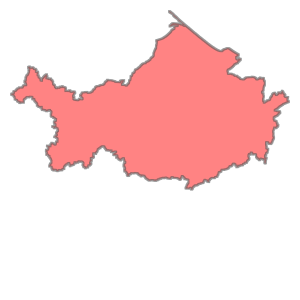

In [40]:
domain

In [41]:
%%time
idx0 = index.Index()
for i, g in enumerate(gridgeoms):
    idx0.insert(i, g.bounds)

Wall time: 2min 7s


In [42]:
%%time
p = index.Property()
idx0 = index.Index(properties=p)
for i, g in enumerate(gridgeoms):
    idx0.insert(i, g.bounds)

Wall time: 2min 7s


In [43]:
%%time
p = index.Property(leaf_capacity=1000)
idx1 = index.Index(properties=p)
for i, g in enumerate(gridgeoms):
    idx1.insert(i, g.bounds)

Wall time: 3min 44s


In [44]:
%%time
p = index.Property(fill_factor=0.9)
idx2 = index.Index(properties=p)
for i, g in enumerate(gridgeoms):
    idx2.insert(i, g.bounds)

Wall time: 2min 8s


In [45]:
%%time
p = index.Property(fill_factor=0.1)
idx3 = index.Index(properties=p)
for i, g in enumerate(gridgeoms):
    idx3.insert(i, g.bounds)

Wall time: 2min 7s


In [46]:
%%time
def generator_function():
    for i, obj in enumerate(gridgeoms):
        yield (i, obj.bounds, obj)
r = index.Index(generator_function(), properties=p)

Wall time: 1min 55s


In [47]:
p = index.Property()
p.fill_factor

0.7

In [48]:
%%time
inds = [i for i in idx0.intersection(domain.bounds)]
inds0 = [i for i in inds if gridgeoms[i].intersects(domain)]

Wall time: 10min 5s


In [49]:
%%time
inds = [i for i in idx1.intersection(domain.bounds)]
inds1 = [i for i in inds if gridgeoms[i].intersects(domain)]

Wall time: 10min 6s


In [50]:
%%time
inds = [i for i in idx2.intersection(domain.bounds)]
inds2 = [i for i in inds if gridgeoms[i].intersects(domain)]

Wall time: 10min 7s


In [51]:
%%time
inds = [i for i in idx3.intersection(domain.bounds)]
inds3 = [i for i in inds if gridgeoms[i].intersects(domain)]

KeyboardInterrupt: 

In [ ]:
%%time
inds = [i for i in idx.intersection(domain.bounds, objects="raw")]
#inds = [i for i in inds if gridgeoms[i].intersects(domain)]

In [ ]:
len(inds)

In [ ]:
stuff = idx.intersection(domain.bounds, objects="raw")